<a href="https://colab.research.google.com/github/d-hackmt/Deep-Learning-Satellite-Imagery/blob/main/Satellite_Imagery_Segmentation_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MOUNT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# drive.mount("/content/drive", force_remount=True)

DATA PREPROCESSING

## About PATCHES

Patch size is a term used in deep learning to refer to the width and height of an image that is extracted for training or testing. This patch, also called a window, is usually defined by the user and created from cutting out part of an image that contains all necessary features for analysis.

Patch size plays an important role in the effective utilization of deep learning. It is used to define the subset of training images that are fed into the Deep Neural Network (DNN) for training or supervised learning. Smaller patch sizes allow DNNs to process subsets of data more quickly and efficiently, but can lead to undesirable results such as overfitting due to insufficient exposure by the model on large scale datasets used for training. On the other hand, larger patch sizes enable DNNs to access a broader set of features contained in scene imagery which thus reduces noise levels during segmentation tasks and leads to improved accuracy; however it does slow down processing time because larger sets of data need more resources.

In [ ]:
!pip install patchify

## Importing Libraries and dataset


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 4 root root 4.0K Jan 25 10:46 'Tile 1'
drwx------ 4 root root 4.0K Jan 25 10:46 'Tile 2'
drwx------ 4 root root 4.0K Jan 25 10:46 'Tile 3'
drwx------ 4 root root 4.0K Jan 25 10:46 'Tile 4'
drwx------ 4 root root 4.0K Jan 25 10:46 'Tile 5'
drwx------ 4 root root 4.0K Jan 25 10:46 'Tile 6'
drwx------ 4 root root 4.0K Jan 25 10:46 'Tile 7'
drwx------ 4 root root 4.0K Jan 25 10:46 'Tile 8'


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/data/'

In [ ]:
dataset_name = "dubai_dataset"

Extracting files from dataset

How to get all directories

In [ ]:
for path , subdirs , files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  print(dir_name)


dubai_dataset
Tile 8
images
masks
Tile 2
images
masks
Tile 3
masks
images
Tile 1
images
masks
Tile 7
images
masks
Tile 5
masks
images
Tile 4
masks
images
Tile 6
masks
images


In [ ]:
for path , subdirs , files in os.walk(os.path.join(dataset_root_folder , dataset_name )):
  dir_name = path.split(os.path.sep)[-1]
  print(dir_name)

dubai_dataset
Tile 8
images
masks
Tile 2
images
masks
Tile 3
masks
images
Tile 1
images
masks
Tile 7
images
masks
Tile 5
masks
images
Tile 4
masks
images
Tile 6
masks
images


## Now figure out we want to process images or masks

Images

In [ ]:
for path , subdirs , files in os.walk(os.path.join(dataset_root_folder , dataset_name )):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == 'images':  #masks
    images = os.listdir(path)
    print(images)

['image_part_006.jpg', 'image_part_009.jpg', 'image_part_001.jpg', 'image_part_004.jpg', 'image_part_007.jpg', 'image_part_005.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_008.jpg']
['image_part_002.jpg', 'image_part_005.jpg', 'image_part_004.jpg', 'image_part_001.jpg', 'image_part_003.jpg', 'image_part_006.jpg', 'image_part_008.jpg', 'image_part_009.jpg', 'image_part_007.jpg']
['image_part_002.jpg', 'image_part_007.jpg', 'image_part_003.jpg', 'image_part_008.jpg', 'image_part_006.jpg', 'image_part_005.jpg', 'image_part_009.jpg', 'image_part_001.jpg', 'image_part_004.jpg']
['image_part_007.jpg', 'image_part_001.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_002.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_009.jpg', 'image_part_008.jpg']
['image_part_004.jpg', 'image_part_003.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg', 'image_part_002.jpg', 'image_part_001.jpg', 'image_part_005.jpg']
['ima

In [ ]:
for path , subdirs , files in os.walk(os.path.join(dataset_root_folder , dataset_name )):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == 'masks':  #masks
    masks = os.listdir(path)
    print(masks)

['image_part_001.png', 'image_part_002.png', 'image_part_006.png', 'image_part_005.png', 'image_part_007.png', 'image_part_003.png', 'image_part_004.png', 'image_part_008.png', 'image_part_009.png']
['image_part_007.png', 'image_part_003.png', 'image_part_004.png', 'image_part_008.png', 'image_part_009.png', 'image_part_001.png', 'image_part_005.png', 'image_part_006.png', 'image_part_002.png']
['image_part_004.png', 'image_part_008.png', 'image_part_002.png', 'image_part_003.png', 'image_part_007.png', 'image_part_005.png', 'image_part_009.png', 'image_part_006.png', 'image_part_001.png']
['image_part_002.png', 'image_part_007.png', 'image_part_006.png', 'image_part_001.png', 'image_part_004.png', 'image_part_003.png', 'image_part_009.png', 'image_part_008.png', 'image_part_005.png']
['image_part_008.png', 'image_part_009.png', 'image_part_003.png', 'image_part_004.png', 'image_part_001.png', 'image_part_006.png', 'image_part_007.png', 'image_part_002.png', 'image_part_005.png']
['ima

Enumerate into images or masks

Images

In [ ]:
for path , subdirs , files in os.walk(os.path.join(dataset_root_folder , dataset_name )):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    for i , image_name in enumerate(images):
      if (image_name.endswith('.jpg')):
        print(image_name)


image_part_006.jpg
image_part_009.jpg
image_part_001.jpg
image_part_004.jpg
image_part_007.jpg
image_part_005.jpg
image_part_002.jpg
image_part_003.jpg
image_part_008.jpg
image_part_002.jpg
image_part_005.jpg
image_part_004.jpg
image_part_001.jpg
image_part_003.jpg
image_part_006.jpg
image_part_008.jpg
image_part_009.jpg
image_part_007.jpg
image_part_002.jpg
image_part_007.jpg
image_part_003.jpg
image_part_008.jpg
image_part_006.jpg
image_part_005.jpg
image_part_009.jpg
image_part_001.jpg
image_part_004.jpg
image_part_007.jpg
image_part_001.jpg
image_part_003.jpg
image_part_004.jpg
image_part_002.jpg
image_part_005.jpg
image_part_006.jpg
image_part_009.jpg
image_part_008.jpg
image_part_004.jpg
image_part_003.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_002.jpg
image_part_001.jpg
image_part_005.jpg
image_part_002.jpg
image_part_008.jpg
image_part_007.jpg
image_part_009.jpg
image_part_004.jpg
image_part_005.jpg
image_part_001.jpg
image_part_0

Masks

In [ ]:
for path , subdirs , files in os.walk(os.path.join(dataset_root_folder , dataset_name )):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == 'masks':
    masks = os.listdir(path)
    for i , mask_name in enumerate(masks):
      if (mask_name.endswith('.png')):
        print(mask_name)


image_part_001.png
image_part_002.png
image_part_006.png
image_part_005.png
image_part_007.png
image_part_003.png
image_part_004.png
image_part_008.png
image_part_009.png
image_part_007.png
image_part_003.png
image_part_004.png
image_part_008.png
image_part_009.png
image_part_001.png
image_part_005.png
image_part_006.png
image_part_002.png
image_part_004.png
image_part_008.png
image_part_002.png
image_part_003.png
image_part_007.png
image_part_005.png
image_part_009.png
image_part_006.png
image_part_001.png
image_part_002.png
image_part_007.png
image_part_006.png
image_part_001.png
image_part_004.png
image_part_003.png
image_part_009.png
image_part_008.png
image_part_005.png
image_part_008.png
image_part_009.png
image_part_003.png
image_part_004.png
image_part_001.png
image_part_006.png
image_part_007.png
image_part_002.png
image_part_005.png
image_part_004.png
image_part_006.png
image_part_007.png
image_part_005.png
image_part_003.png
image_part_008.png
image_part_009.png
image_part_0

Masks path extract with checking

In [ ]:
for path , subdirs , files in os.walk(os.path.join(dataset_root_folder , dataset_name )):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == 'masks':   #images
    masks = os.listdir(path)
    print(path)
    for i , mask_name in enumerate(masks):
      if (mask_name.endswith('.png')):  #.jpg
        # print(mask_name)
        a = True

/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 6/masks


Images path extract with checking

In [ ]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.jpg')): # '.jpg
        #print(image_name)
        b = True

/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 8/images
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 2/images
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 3/images
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 1/images
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 7/images
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 5/images
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 4/images
/content/drive/MyDrive/Colab Notebooks/data/dubai_dataset/Tile 6/images


## READING AND PROCESSING SATELLITE IMAGES

Read an image

In the OpenCV library, the cv2.imread function is used to read an image from a file. The second parameter of this function specifies the flag that controls how the image should be read.


Here are some commonly used flags in cv2.imread:

cv2.IMREAD_COLOR (1): Load a color image.

cv2.IMREAD_GRAYSCALE (0): Load an image in grayscale.

cv2.IMREAD_UNCHANGED (-1): Load an image including alpha channel (if exists).

In your case, using 1 as the second parameter indicates that you want to read the image with color channels. If you only needed the grayscale version of the image, you could use 0 as the second parameter.


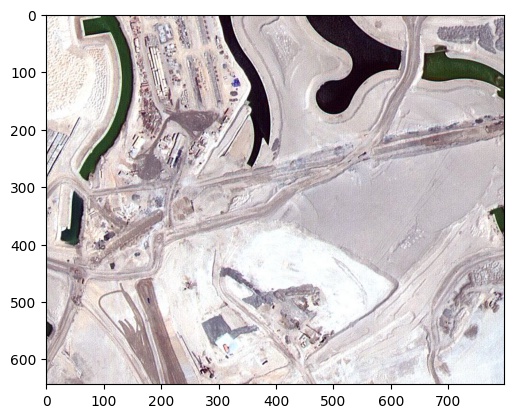

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg', 1)
plt.imshow(image)

In [ ]:
image.shape

(644, 797, 3)

Read a mask

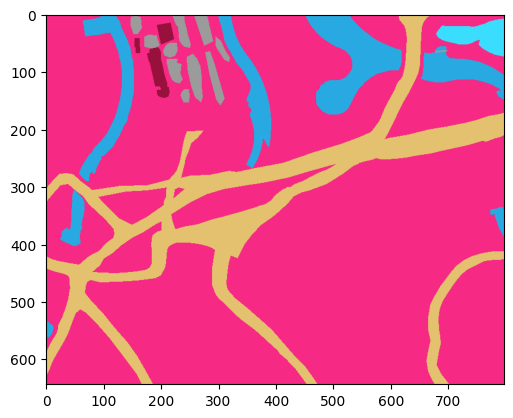

In [ ]:
mask = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/masks/image_part_001.png', 1)
plt.imshow(mask)

In [ ]:
mask.shape

(644, 797, 3)

In this below code output you can see
For each tile all the images in that tile are same but in individual tiles are different

In [ ]:
# Remember tile has the id and image has the id
# making dataset as its divided into tiles folder

image_dataset = []

image_extension = 'jpg' #.png
image_type = 'images'
for tile_id in range(1,8):   # there are 8 tiles and some 9--10 images and masks
  for image_id in range(1,20):   # there arent 20 images , its just a loop iteration
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}' , 1)
    if image is not None:
      print(image.shape)

(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(643, 797, 3)
(643, 797, 3)
(643, 797, 3)
(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)
(2062, 1817, 3)
(2062, 1816, 3)
(2062, 1817, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)


For masks

In [ ]:
# Remember tile has the id and image has the id
# making dataset as its divided into tiles folder

image_dataset = []
image_type = 'masks'
image_extension = 'png'
for tile_id in range(1,8):   # there are 8 tiles and some 9--10 images and masks
  for mask_id in range(1,20):   # there arent 20 masks , its just a loop iteration
    mask = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{mask_id}.{image_extension}' , 1)
    if mask is not None:
      print(mask.shape)

(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(643, 797, 3)
(643, 797, 3)
(643, 797, 3)
(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)
(2062, 1817, 3)
(2062, 1816, 3)
(2062, 1817, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)


## Patching of image

We have to decide the patch size i.e 256x256 or 512x512

make sure all the tiles and masks images size is the multiple of patch size

split all the images into the patch size and then convert it into numpy array

In [ ]:
image_patch_size = 256

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg', 1)
# plt.imshow(image)
print(image.shape)

(544, 509, 3)


 This function is often used for dividing an image into patches or tiles.

The patchify function will take the input image and create a "patch grid" by extracting non-overlapping patches from the image according to the specified size and step. The result, image_patches, will be a 4D NumPy array where each element corresponds to a patch in the image.

In [ ]:
image_patches = patchify(image , (image_patch_size , image_patch_size , 3) , step = image_patch_size)

In [ ]:
len(image_patches)

2

Here below , 256 x 256 x 3 is our patched image

In [ ]:
print(image_patches.shape)
print(image_patches.shape[0])
print(image_patches.shape[1])
print(image_patches.shape[2])
print(image_patches.shape[3])
print(image_patches.shape[4])
print(image_patches.shape[5])

(2, 1, 1, 256, 256, 3)
2
1
1
256
256
3


In [ ]:
minmaxscaler = MinMaxScaler()

Here we have performed the min max scalar demo

In [ ]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)
print(image_y.shape)
print(image_y[0].shape)

(1, 256, 256, 3)
(256, 256, 3)


In [ ]:
print(type(image))

<class 'numpy.ndarray'>


To convert into image type

In [ ]:
type(Image.fromarray(image))

PIL.Image.Image

Here above 544 x 509

X = 509 and y will be 544

In [ ]:
image.shape[0]//image_patch_size   #544//256

2

THis is how all the images has multiples of patch size

In [ ]:
(image.shape[0]//image_patch_size)*image_patch_size

512

You can see in this how all values are adjusted into multiples of 256 below

In [ ]:
# define it here
image_dataset = []

image_extension = 'jpg' #.png
image_type = 'images'
for tile_id in range(1,8):   # there are 8 tiles and some 9--10 images and masks
  for image_id in range(1,20):   # there arent 20 images , its just a loop iteration
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}' , 1)
    if image is not None:
      # print(image.shape)
      # getting x and y for each images
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      print("{}---{}---{}".format(image.shape , size_x , size_y))



(644, 797, 3)---768---512
(644, 797, 3)---768---512
(644, 797, 3)---768---512
(643, 797, 3)---768---512
(643, 797, 3)---768---512
(643, 797, 3)---768---512
(644, 797, 3)---768---512
(644, 797, 3)---768---512
(644, 797, 3)---768---512
(544, 509, 3)---256---512
(544, 510, 3)---256---512
(544, 509, 3)---256---512
(544, 509, 3)---256---512
(544, 510, 3)---256---512
(544, 509, 3)---256---512
(544, 509, 3)---256---512
(544, 510, 3)---256---512
(544, 509, 3)---256---512
(658, 682, 3)---512---512
(658, 682, 3)---512---512
(658, 682, 3)---512---512
(658, 682, 3)---512---512
(658, 682, 3)---512---512
(658, 682, 3)---512---512
(658, 682, 3)---512---512
(658, 682, 3)---512---512
(658, 682, 3)---512---512
(846, 1099, 3)---1024---768
(846, 1099, 3)---1024---768
(846, 1099, 3)---1024---768
(846, 1099, 3)---1024---768
(846, 1099, 3)---1024---768
(846, 1099, 3)---1024---768
(846, 1099, 3)---1024---768
(846, 1099, 3)---1024---768
(846, 1099, 3)---1024---768
(1058, 1126, 3)---1024---1024
(1058, 1126, 3)-

using pillow library we have to convert our image type from numpy nd arrary to image type

In [ ]:
# define it here
image_dataset = []

image_extension = 'jpg' #.png
image_type = 'images'
for tile_id in range(1,8):   # there are 8 tiles and some 9--10 images and masks
  for image_id in range(1,20):   # there arent 20 images , its just a loop iteration
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}' , 1)
    if image is not None:
      # print(image.shape)
      # getting x and y for each images
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      # print("{}---{}---{}".format(image.shape , size_x , size_y))
      # converting ndarray into image

      image = Image.fromarray(image)
      image = image.crop((0,0,size_x , size_y))
      print(" Image size at Y = {} , Image size at X = {}".format(image.size[0] , image.size[1] ))



 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 768 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 256 , Image size at X = 512
 Image size at Y = 512 , Image size at X = 512
 Image size at Y = 512 , Image size at X = 512
 Image size at Y = 512 , Image size at X = 512
 Image size a

Now all of our images can be cropped based on image_patch size

So we get different patched images length

In [ ]:
# define it here
image_dataset = []
image_patch_size = 256

image_extension = 'jpg' #.png
image_type = 'images'
for tile_id in range(1,8):   # there are 8 tiles and some 9--10 images and masks
  for image_id in range(1,20):   # there arent 20 images , its just a loop iteration
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}' , 1)
    if image is not None:
      # print(image.shape)
      # getting x and y for each images
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      # print("{}---{}---{}".format(image.shape , size_x , size_y))
      # converting ndarray into image

      image = Image.fromarray(image)
      image = image.crop((0,0,size_x , size_y))
      # print(" Image size at Y = {} , Image size at X = {}".format(image.size[0] , image.size[1] ))
      # make sure all images are patched to multiple of 256*256 , our patch size using patchify


      # now we are ding patching but patchify takes input as arrary so we again have to convert it from image to array

      image = np.array(image)
      patched_images = patchify(image , (image_patch_size , image_patch_size , 3) , step = image_patch_size)
      print(len(patched_images))


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
8
8
8
8
8
8
8
8
8


Here in the below code output , image has transformed in 1 , image size with the enumeration and slicing code logic in the end

In [ ]:
# define it here
image_dataset = []
image_patch_size = 256

image_extension = 'jpg' #.png
image_type = 'images'
for tile_id in range(1,8):   # there are 8 tiles and some 9--10 images and masks
  for image_id in range(1,20):   # there arent 20 images , its just a loop iteration
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}' , 1)
    if image is not None:
      # print(image.shape)
      # getting x and y for each images
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      # print("{}---{}---{}".format(image.shape , size_x , size_y))
      # converting ndarray into image

      image = Image.fromarray(image)
      image = image.crop((0,0,size_x , size_y))
      # print(" Image size at Y = {} , Image size at X = {}".format(image.size[0] , image.size[1] ))
      # make sure all images are patched to multiple of 256*256 , our patch size using patchify


      # now we are ding patching but patchify takes input as arrary so we again have to convert it from image to array

      image = np.array(image)
      patched_images = patchify(image , (image_patch_size , image_patch_size , 3) , step = image_patch_size)
      # print(len(patched_images))
      # so now for al the patch_image.shape[0] and [1] we have to enumerate

      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          # we are doing this because our shape is 2 * 1 * 1 * 25* * 256
          # so we are going in 0 then 1 and then we will remove another 1 to get 256 * 256*3
          individual_patched_image = patched_images[i,j,:,:]   # slicing
          print(individual_patched_image.shape)



(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 3)
(1, 256, 256, 

## NOW WE WILL NORMALIZE

Using minmaxscalar() from sklearn library

and we will convert every pixel value between 0 and 1


and extract the image size 256 x 256 x 3

In [ ]:
# define it here
image_dataset = []
image_patch_size = 256

image_extension = 'jpg' #.png
image_type = 'images'
for tile_id in range(1,8):   # there are 8 tiles and some 9--10 images and masks
  for image_id in range(1,20):   # there arent 20 images , its just a loop iteration
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}' , 1)
    if image is not None:
      # print(image.shape)
      # getting x and y for each images
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      # print("{}---{}---{}".format(image.shape , size_x , size_y))
      # converting ndarray into image

      image = Image.fromarray(image)
      image = image.crop((0,0,size_x , size_y))
      # print(" Image size at Y = {} , Image size at X = {}".format(image.size[0] , image.size[1] ))
      # make sure all images are patched to multiple of 256*256 , our patch size using patchify


      # now we are ding patching but patchify takes input as arrary so we again have to convert it from image to array

      image = np.array(image)
      patched_images = patchify(image , (image_patch_size , image_patch_size , 3) , step = image_patch_size)
      # print(len(patched_images))
      # so now for al the patch_image.shape[0] and [1] we have to enumerate

      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          # we are doing this because our shape is 2 * 1 * 1 * 25* * 256
          # so we are going in 0 then 1 and then we will remove another 1 to get 256 * 256*3
          individual_patched_image = patched_images[i,j,:,:]   # slicing
          # print(individual_patched_image.shape)

          # min max scalar transform below
          individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
          individual_patched_image = individual_patched_image[0]
          print(individual_patched_image.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

Now scaling has been done and image has been extracted

now we will append it to the array of image dataset

In [ ]:
# define it here
image_dataset = []
image_patch_size = 256

image_extension = 'jpg' #.png
image_type = 'images'
for tile_id in range(1,8):   # there are 8 tiles and some 9--10 images and masks
  for image_id in range(1,20):   # there arent 20 images , its just a loop iteration
    image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}' , 1)
    if image is not None:
      # print(image.shape)
      # getting x and y for each images
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      # print("{}---{}---{}".format(image.shape , size_x , size_y))
      # converting ndarray into image

      image = Image.fromarray(image)
      image = image.crop((0,0,size_x , size_y))
      # print(" Image size at Y = {} , Image size at X = {}".format(image.size[0] , image.size[1] ))
      # make sure all images are patched to multiple of 256*256 , our patch size using patchify


      # now we are ding patching but patchify takes input as arrary so we again have to convert it from image to array

      image = np.array(image)
      patched_images = patchify(image , (image_patch_size , image_patch_size , 3) , step = image_patch_size)
      # print(len(patched_images))
      # so now for al the patch_image.shape[0] and [1] we have to enumerate

      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          # we are doing this because our shape is 2 * 1 * 1 * 25* * 256
          # so we are going in 0 then 1 and then we will remove another 1 to get 256 * 256*3
          individual_patched_image = patched_images[i,j,:,:]   # slicing
          # print(individual_patched_image.shape)

          # min max scalar transform below
          individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
          individual_patched_image = individual_patched_image[0]
          # print(individual_patched_image.shape)
          image_dataset.append(individual_patched_image)

We have 945 images stored in our image dataset

In [ ]:
len(image_dataset)

945

Now do the same for adding masks dataset

### THIS IS MAIN AND FINAL METHOD

here we are changing masks to RGB from BGR

also masks images are not suppossed to be normalized since they are not the input images

In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          # we do this because we want in RGB since its on BGR by default
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


## Rendering Source and Mask Images

Reading the  processed image and  mask dataset and check content


Now we have to validate can we make sure images stored on both data sets are correct

In [ ]:
image_dataset[0]

array([[[0.78823529, 0.76470588, 0.74509804],
        [0.88235294, 0.85882353, 0.83921569],
        [0.94509804, 0.90980392, 0.89411765],
        ...,
        [0.89411765, 0.85882353, 0.82352941],
        [0.85882353, 0.83137255, 0.79607843],
        [0.87843137, 0.85098039, 0.81568627]],

       [[0.88627451, 0.8627451 , 0.84313725],
        [0.99607843, 0.97254902, 0.95294118],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89803922, 0.8627451 ],
        [0.92941176, 0.90196078, 0.86666667],
        [0.95294118, 0.91764706, 0.88235294]],

       [[0.97254902, 0.94509804, 0.93333333],
        [1.        , 0.98823529, 0.97647059],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89411765, 0.86666667],
        [0.92156863, 0.89411765, 0.85882353],
        [0.90196078, 0.86666667, 0.83137255]],

       ...,

       [[0.88235294, 0.8627451 , 0.86666667],
        [0.81960784, 0.80392157, 0.8       ],
        [0.7372549 , 0

In [ ]:
mask_dataset[0]

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

SO now we have to make sure that data is uniform in both of them

Just to confirm both are in nump array because we have to feed to Neural Network

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

<class 'numpy.ndarray'>


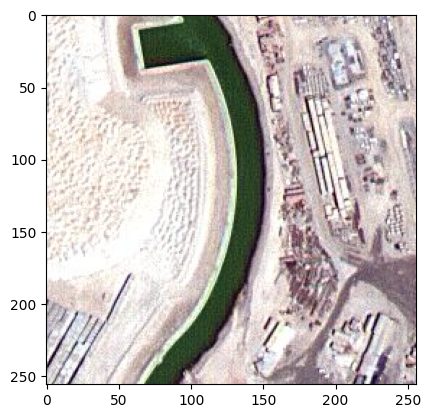

In [ ]:
plt.imshow(image_dataset[0])
print(type(image_dataset))

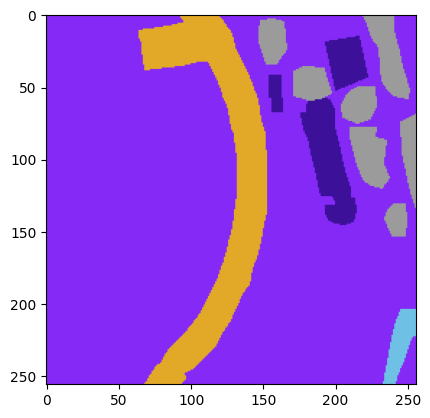

In [ ]:
plt.imshow(mask_dataset[0])

 The subplot function is used to create subplots in a figure. The function takes three integer arguments, which are typically specified as a single three-digit number. The three digits represent the number of rows, the number of columns, and the index of the subplot in that grid.

plt.subplot(nrows, ncols, index)


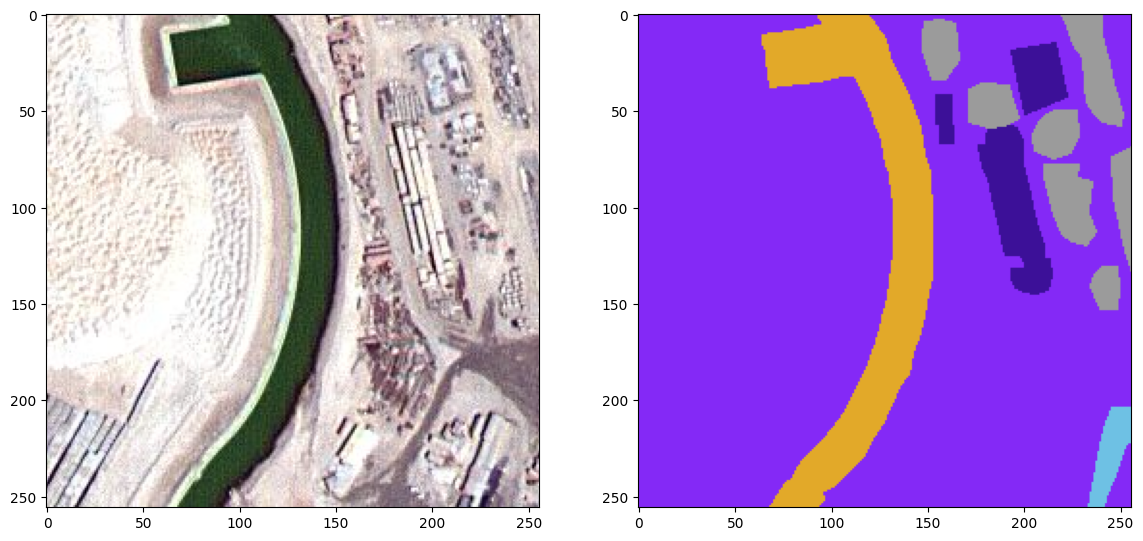

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[0])
plt.subplot(122)
plt.imshow(mask_dataset[0])

Now we have to pick any on random

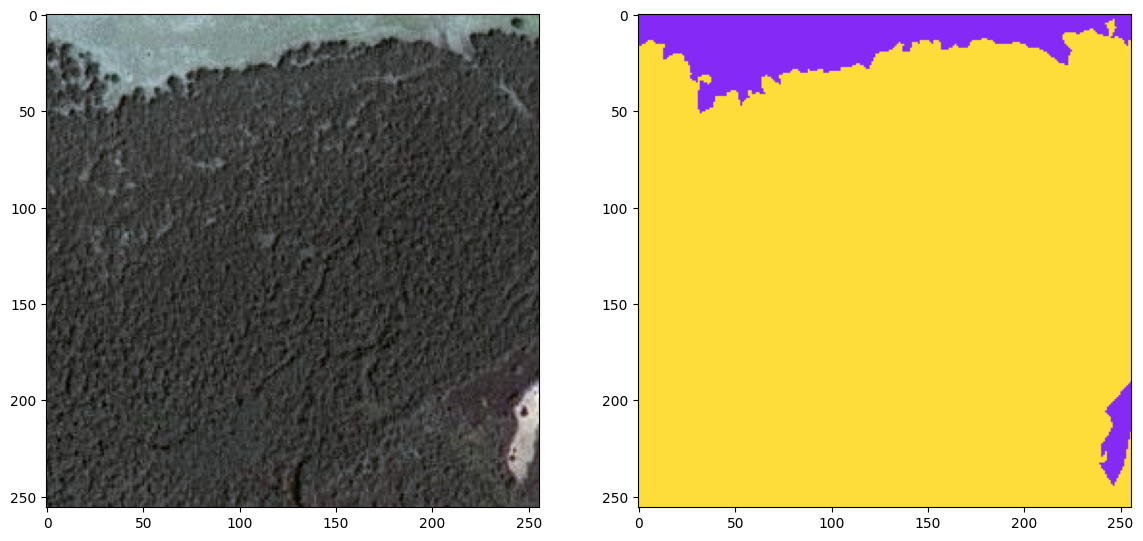

In [ ]:
random_image_id = random.randint(0 , len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

## Processing Mask Labels and add the one hot encoding for labels (color channels)


The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:

Building: #3C1098

Land (unpaved area): #8429F6

Road: #6EC1E4

Vegetation: #FEDD3A

Water: #E2A929

Unlabeled: #9B9B9B


(0, 2, 4): This is a tuple of indices (0, 2, 4). These indices are used to slice the string into three segments: (0:2), (2:4), and (4:).


class_building[i:i+2]: This slices the string based on the indices provided. For example, class_building[0:2] extracts the substring "3C".


int(..., 16): This converts each sliced hexadecimal substring into an integer. The 16 is the base for conversion, indicating that the input string is in base-16 (hexadecimal).


for i in (0, 2, 4): This iterates over the indices specified in the tuple.


Finally, the entire expression is wrapped in tuple(...) to create a tuple from the results.


So, the result of this line of code would be a tuple of three integers:

(60, 16, 152)

Each integer corresponds to the decimal representation of the hex values "3C", "10", and "98", respectively.

In [ ]:
# HEX to RGB

class_building = '#3C1098'
class_building = class_building.lstrip('#')

# we need to convert this into 3 segments
# 3C 10 98
# so we nned to generate all in tuple

class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


Because these labels belong ot only our mask data set we need to create a method which takes RGB value and converts into 2d label

"classes":[6 items

0:{4 items
"title":string"Water"
"shape":string"polygon"
"color":string"#50E3C2"
"geometry_config":{}0 items
}

1:{4 items
"title":string"Land (unpaved area)"
"shape":string"polygon"
"color":string"#F5A623"
"geometry_config":{}0 items
}

2:{4 items
"title":string"Road"
"shape":string"polygon"
"color":string"#DE597F"
"geometry_config":{}0 items
}

3:{4 items
"title":string"Building"
"shape":string"polygon"
"color":string"#D0021B"
"geometry_config":{}0 items
}

4:{4 items
"title":string"Vegetation"
"shape":string"polygon"
"color":string"#417505"
"geometry_config":{}0 items
}

5:{4 items
"title":string"Unlabeled"
"shape":string"polygon"
"color":string"#9B9B9B"
"geometry_config":{}0 items
}

In [ ]:
mask_dataset.shape[0]

945

In [ ]:
label = individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [ ]:
len(labels)  # will be same as masked dataset

945

In [ ]:
labels = np.array(labels)


In [ ]:
labels[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
labels = np.expand_dims(labels , axis = 3)   # maybe like transposing

In [ ]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [ ]:
np.unique(labels)    # labels stored in masked classes   !!!

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
print("Total unique labels based on masks :" , format(np.unique(labels)))

Total unique labels based on masks : [0 1 2 3 4 5]


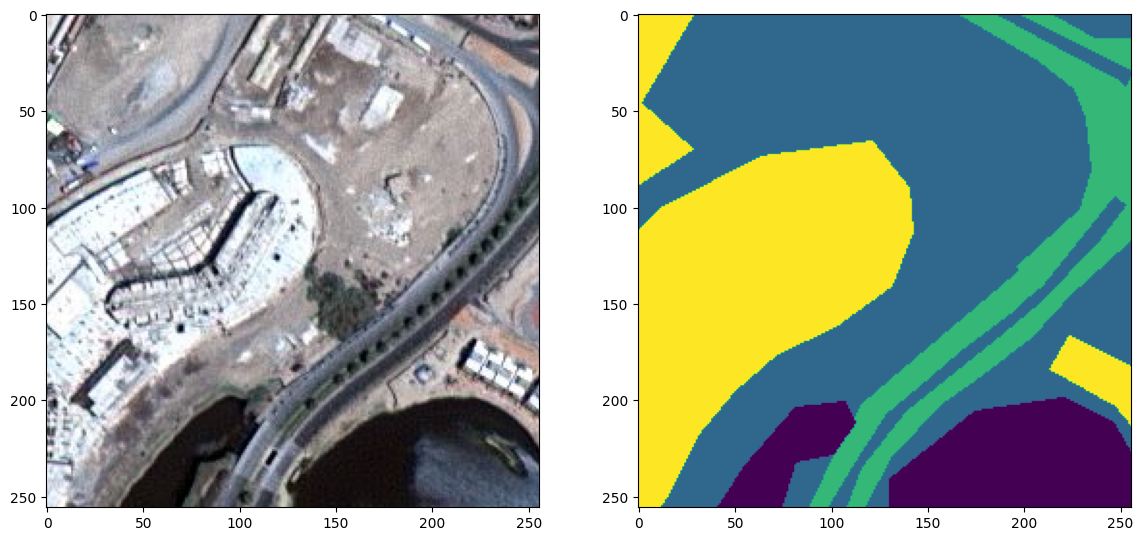

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [ ]:
labels[0][: , : , 0]   # this is what has been used to process the above code

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

## CREATING Training and Testing Splits

In [ ]:
from sklearn.model_selection import train_test_split  # takes input and labels

In [ ]:
master_training_dataset = image_dataset
total_classes = len(np.unique(labels))

In [ ]:
total_classes

6

Create categorical dataset for our classes

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels , num_classes = total_classes)

In [ ]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

85 - 15 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [ ]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# DEEP LEARNING

## Importing Libraries

In [ ]:
# !pip install -U segmentation-models==0.2.1

In [ ]:
!pip install -U segmentation-models

In [ ]:
from keras.models import Model
from keras.layers import Input , Conv2D , MaxPooling2D , UpSampling2D , Conv2DTranspose
from keras.layers import concatenate , BatchNormalization , Dropout ,Lambda

In [ ]:
from keras import backend as K

## Evaluation Metrics

**IOU (Intersection of Union) = overlap / Union**

Also called as Jaccard Index

If **overlap == Union** then **IOU == 1**

If overlap = 1%  union = 100%  then very less value it is

These metrics will say how well your model was trained

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)   # TRUE POSITIVE

  y_pred_flatten = K.flatten(y_pred)   # FALSE POSITIVE

  intersection = K.sum(y_true_flatten * y_pred_flatten)  #FN

  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)

  return final_coef_value


## BUILD OUR MODEL

 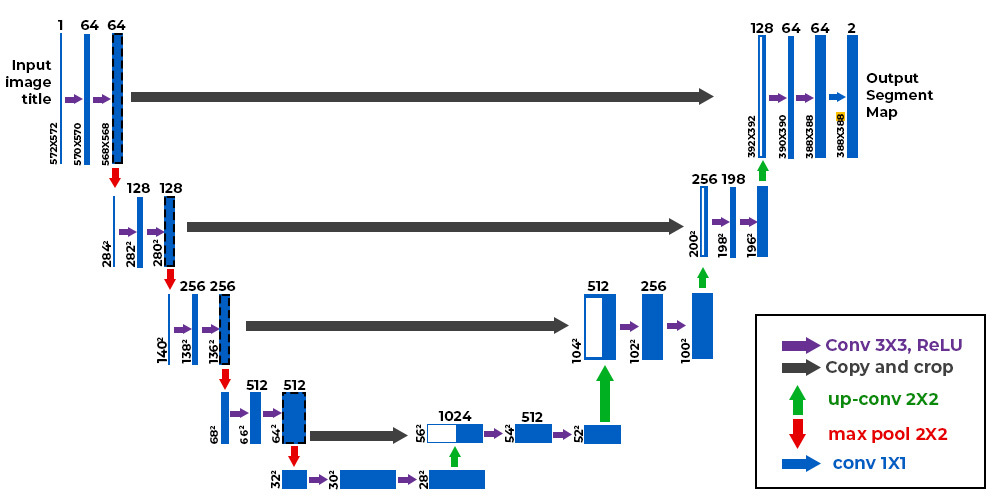

In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  # MAX POOLING

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  # UPSAMPLING

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [ ]:
metrics = ['accuracy' , jaccard_coef]

In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
# model.get_config()

## LOSS FUNCTION AND CALCULATION


**FOCAL LOSS** = extension to cross entropy loss


- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))



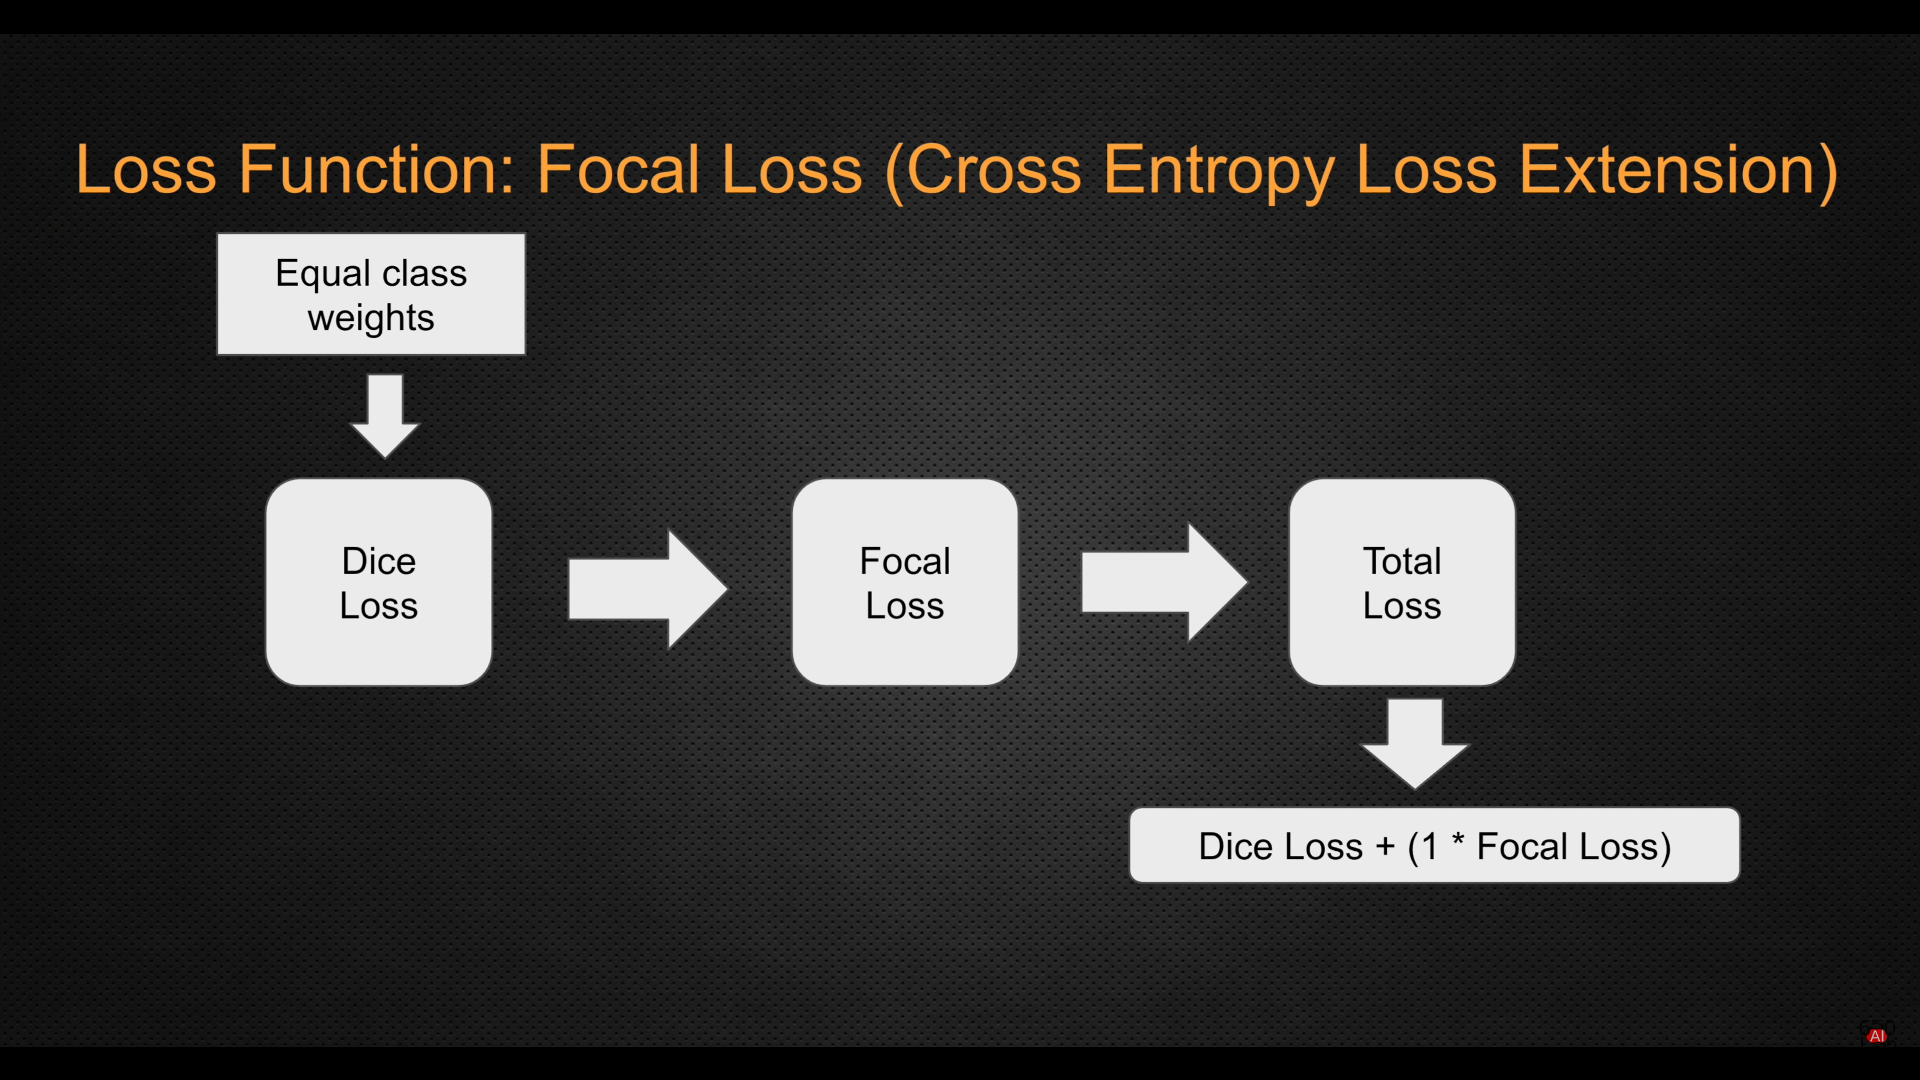

We have **6 classes**

**our equal class weight = .16**

if we had 10 classes we would have 0.10 as equal class weight

if we had 100 classes we would have 0.1 as equal class weight


dice loss is set on equal class weight




In [ ]:
weights = [0.166 , 0.166 , 0.166 , 0.166 , 0.166 ,0.166]

In [ ]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

## Model Compilation

This is the point when we compile the model before start training

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer = "adam" , loss=total_loss , metrics = metrics)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

## MODEL TRAINING

The **model.fit** function in a machine learning framework, such as TensorFlow or Keras, is used to train a neural network model.

X_train: The input features for the training data. It's a NumPy array or a TensorFlow tensor containing the features of the training set.

y_train: The labels or target values corresponding to the training data. It's a NumPy array or a TensorFlow tensor containing the labels of the training set.

batch_size: The number of samples used in each iteration of training. The entire training dataset is divided into batches, and the model's weights are updated after processing each batch. Smaller batch sizes may lead to faster convergence but require more iterations.

verbose: An integer that controls the verbosity of the training output. Set to 1 to display a progress bar during training, and 0 to silence the output.

epochs: The number of times the model will be trained on the entire training dataset. One epoch is a complete pass through the entire dataset.

validation_data: A tuple containing the validation data to evaluate the model's performance on data it hasn't seen during training. In your example, it's (X_test, y_test).

shuffle: A boolean indicating whether to shuffle the training data at the beginning of each epoch. Setting it to False can be useful if your data has a specific order, and you want to maintain that order during training

In [ ]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,     #800 / 16 = 50
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100
51/51 [==============================] - 54s 605ms/step - loss: 0.9936 - accuracy: 0.5949 - jaccard_coef: 0.3119 - val_loss: 0.9801 - val_accuracy: 0.6667 - val_jaccard_coef: 0.3239
Epoch 2/100
51/51 [==============================] - 11s 222ms/step - loss: 0.9679 - accuracy: 0.6985 - jaccard_coef: 0.4252 - val_loss: 0.9644 - val_accuracy: 0.7069 - val_jaccard_coef: 0.4529
Epoch 3/100
51/51 [==============================] - 12s 230ms/step - loss: 0.9576 - accuracy: 0.7341 - jaccard_coef: 0.4852 - val_loss: 0.9655 - val_accuracy: 0.7100 - val_jaccard_coef: 0.4872
Epoch 4/100
51/51 [==============================] - 12s 243ms/step - loss: 0.9500 - accuracy: 0.7560 - jaccard_coef: 0.5149 - val_loss: 0.9587 - val_accuracy: 0.7280 - val_jaccard_coef: 0.5039
Epoch 5/100
51/51 [==============================] - 11s 213ms/step - loss: 0.9461 - accuracy: 0.7656 - jaccard_coef: 0.5336 - val_loss: 0.9562 - val_accuracy: 0.7281 - val_jaccard_coef: 0.5142
Epoch 6/100
51/51 [===========

In [ ]:
print(model_history)

**SAVE** YOUR MODEL

In [ ]:
from tensorflow.keras.models import save_model, load_model

# Assuming 'model' is your trained model
# Save the model to an HDF5 file
model.save("dubai_seg.h5")

# Load the model from the saved file
# loaded_model = load_model("dubai_seg.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## MODEL METRICS

In [ ]:
history_a = model_history

In [ ]:
# to get all history
history_a.history

{'loss': [0.9935637712478638,
  0.9678639769554138,
  0.9576365351676941,
  0.9499697089195251,
  0.9460653066635132,
  0.9422633051872253,
  0.9361067414283752,
  0.9336034059524536,
  0.9300097227096558,
  0.9296079277992249,
  0.9251598119735718,
  0.9231159687042236,
  0.922832727432251,
  0.922208309173584,
  0.9209520220756531,
  0.9193563461303711,
  0.9176524877548218,
  0.916815459728241,
  0.9165663719177246,
  0.9154545068740845,
  0.9152240753173828,
  0.9136389493942261,
  0.9128586053848267,
  0.9118334650993347,
  0.9111284017562866,
  0.9142550230026245,
  0.9103529453277588,
  0.9091275334358215,
  0.9081717133522034,
  0.9072534441947937,
  0.9067438840866089,
  0.9058050513267517,
  0.9063930511474609,
  0.9046566486358643,
  0.903904378414154,
  0.9062927961349487,
  0.9057588577270508,
  0.9070271253585815,
  0.907559871673584,
  0.9117566347122192,
  0.9103496670722961,
  0.9028427004814148,
  0.9019469022750854,
  0.9030551314353943,
  0.9015378355979919,
  0.900

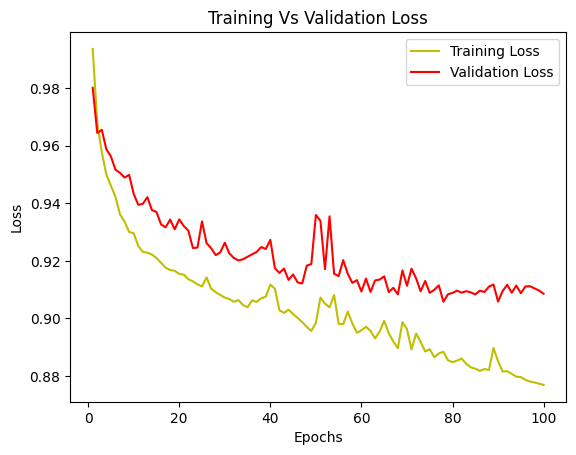

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

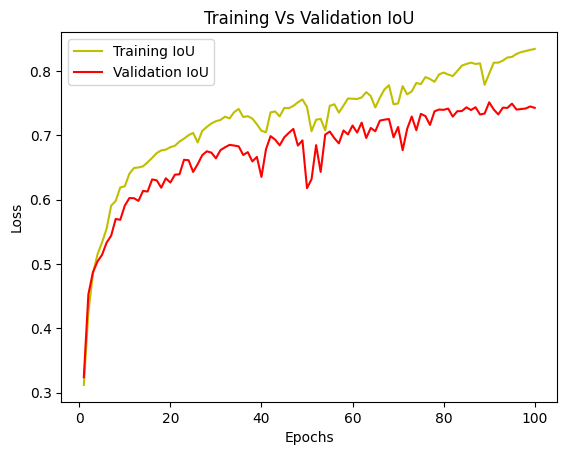

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 5s 58ms/step


In [ ]:
len(y_pred)

142

Assuming that y_pred represents predictions for a multi-class classification problem with probability scores, applying np.argmax along axis 3 will give the indices of the class with the highest probability for each element in the array.

In [ ]:
y_pred_argmax = np.argmax(y_pred , axis = 3)

In [ ]:
len(y_pred_argmax)

142

In [ ]:
y_pred_argmax

array([[[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [2, 2, 2, ..., 4, 4, 4],
        [2, 2, 2, ..., 4, 4, 4],
        [2, 2, 2, ..., 4, 4, 4]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test , axis = 3)

In [ ]:
len(y_pred_argmax)

142

In [ ]:
y_pred_argmax

array([[[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [2, 2, 2, ..., 4, 4, 4],
        [2, 2, 2, ..., 4, 4, 4],
        [2, 2, 2, ..., 4, 4, 4]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [ ]:
import random

In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 1s 994ms/step


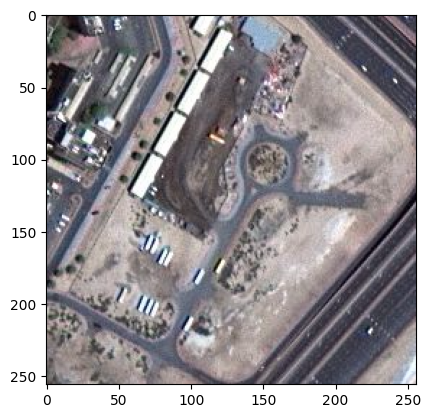

In [ ]:
plt.imshow(test_image)

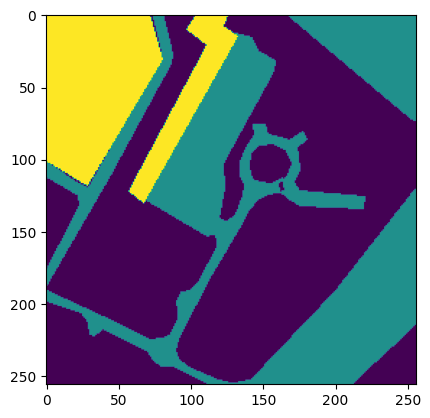

In [ ]:
plt.imshow(ground_truth_image)

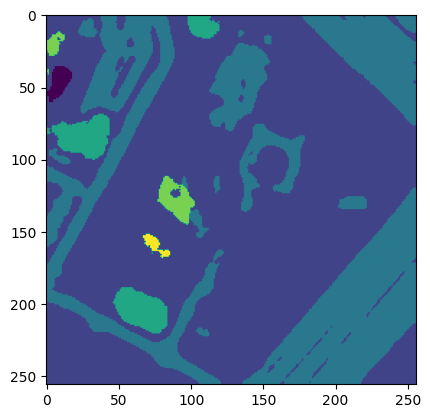

In [ ]:
plt.imshow(predicted_image)

Plot to show the image

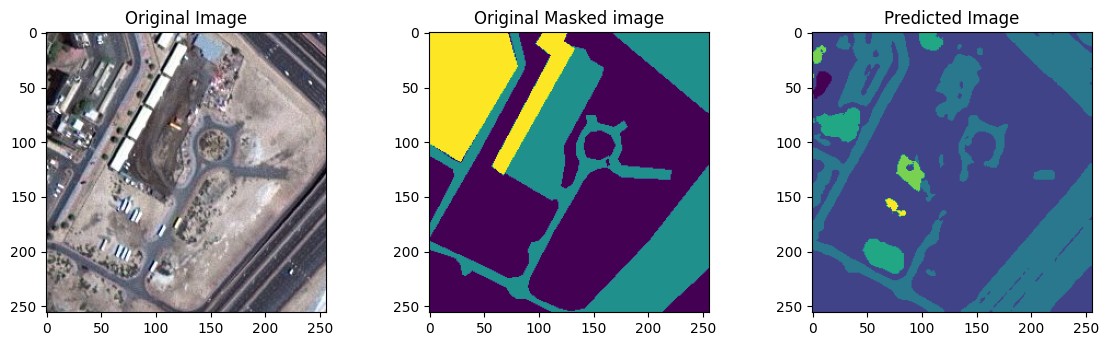

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)